In [1]:
from LSTM_trainer import *
from models.attentionalLSTM import PairAttnLSTM
from data.data import get_dataloader_LSTM
from LSTM_trainer import flat_accuracy, trainer

There are 1 GPU(s) available.
We will use the GPU: Tesla M40 24GB


In [2]:
data_file = "combine_balanced.csv"
BATCH = 32
MAX_LEN = 128
EPOCHS = 15
EARLY_STOP = 2
LR = 5e-5
# LR = 5e-6
# WD = 1e-2
WD = 1e-3
# WD = 1e-4
EPS = 1e-8

In [3]:
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

In [4]:
train_dataloader, validation_dataloader = get_dataloader_LSTM(tokenizer, data_file, BATCH, MAX_LEN)

loading data ...


  0%|          | 202/101082 [00:00<00:50, 2013.47it/s]

Encoding sentences ...


100%|██████████| 101082/101082 [00:19<00:00, 5210.39it/s]


Get dataloader ...
torch.Size([101082, 128])
torch.Size([101082, 128])
101082
75811 25271
2370 790


In [5]:
from torch.optim.lr_scheduler import StepLR

classifier = PairAttnLSTM(embedding_dim=768, hidden_dim=128, num_layers=1, label_size=2)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    # Filter for all parameters which *don't* include 'bias', 'gamma', 'beta'.
    {'params': [p for n, p in classifier.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': WD},
            
    # Filter for parameters which *do* include those.
    {'params': [p for n, p in classifier.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}]

optimizer = AdamW(optimizer_grouped_parameters, lr = LR, eps = EPS)

total_steps = len(train_dataloader)

# Create the learning rate scheduler.
# scheduler = get_linear_schedule_with_warmup(optimizer, 
#                                             num_warmup_steps = 0, # Default value in run_glue.py
#                                             num_training_steps = total_steps)
scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95)

In [6]:
# scheduler = StepLR(optimizer, step_size=2 * total_steps, gamma=0.9)
#classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader)

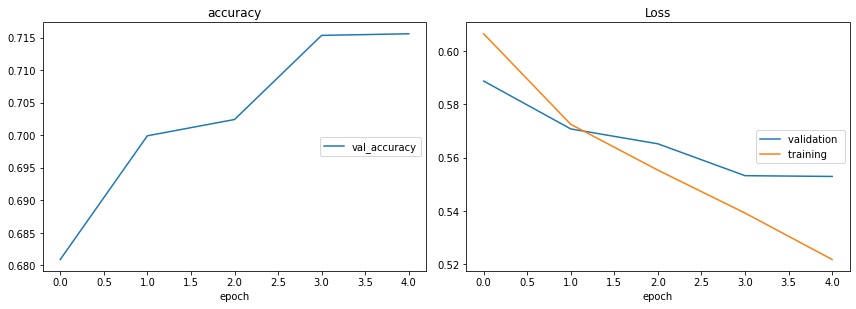

accuracy
	val_accuracy     	 (min:    0.681, max:    0.716, cur:    0.716)
Loss
	validation       	 (min:    0.553, max:    0.589, cur:    0.553)
	training         	 (min:    0.522, max:    0.606, cur:    0.522)

======== Epoch 6 / 15 ========
Global Learning Rate 3.868904687499999e-05
Training...
Step 0 with loss 0.667 elapsed time 1.090
Step 100 with loss 0.415 elapsed time 109.422
Step 200 with loss 0.443 elapsed time 217.761
Step 300 with loss 0.491 elapsed time 326.134
Step 400 with loss 0.504 elapsed time 434.477
Step 500 with loss 0.487 elapsed time 542.881
Step 600 with loss 0.439 elapsed time 651.284
Step 700 with loss 0.422 elapsed time 759.767
Step 800 with loss 0.397 elapsed time 868.028
Step 900 with loss 0.491 elapsed time 976.307
Step 1000 with loss 0.425 elapsed time 1084.697


In [ ]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95)
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader)

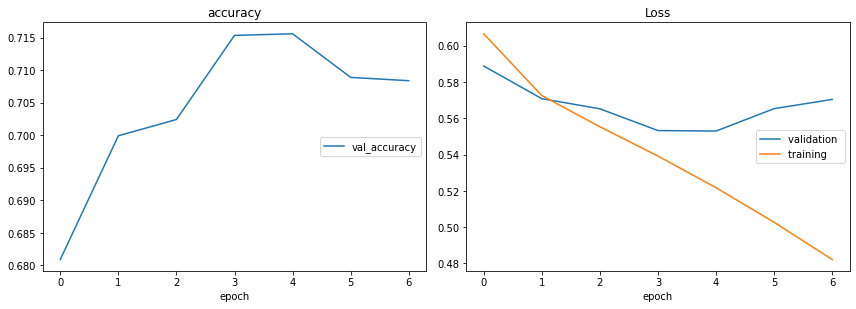

accuracy
	val_accuracy     	 (min:    0.681, max:    0.716, cur:    0.708)
Loss
	validation       	 (min:    0.553, max:    0.589, cur:    0.570)
	training         	 (min:    0.482, max:    0.606, cur:    0.482)
early_stopping, epoch: 7
Final dev loss 450.568875 Final Train Loss 1142.742224 Final dev accuracy 0.708372
Best dev loss 436.803899 Best dev accuracy 0.715580
F1_score Sarcasm  (0.6832293734051602, 0.7686602870813397, 0.723431401981387, None)
F1_score Non-Sarcasm  (0.7401236226820748, 0.6489670882098814, 0.6915543651125806, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95)
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader)